In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv("/content/house_price_regression_dataset.csv")
df.sample(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
225,4567,2,2,1988,2.546926,0,6,938151.837245
264,690,4,3,1957,3.511889,2,4,203867.042923
907,2490,5,1,1950,4.168743,1,10,567376.400695
898,2622,1,3,1971,3.402063,0,4,561747.262404
71,879,4,1,1996,0.718959,2,4,217010.485267


In [177]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [178]:
df.duplicated().sum()

np.int64(0)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [180]:
df.describe()
# the data is normally distributed

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


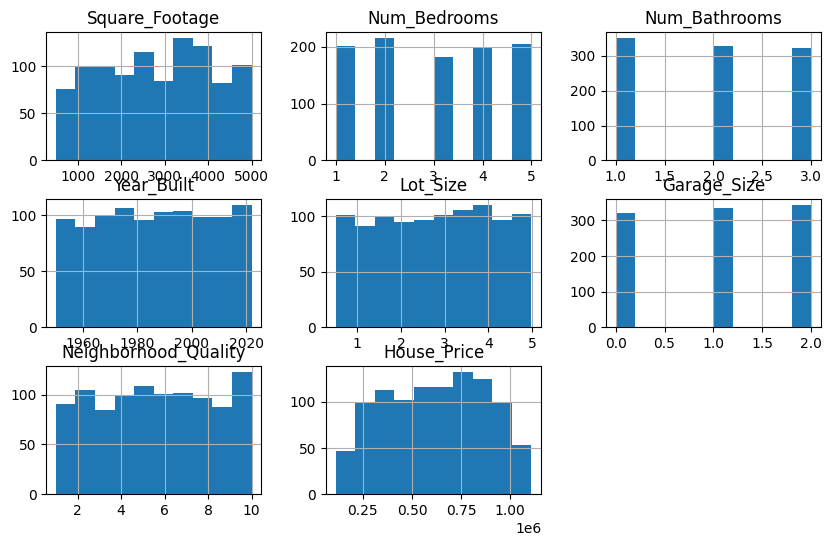

In [181]:
df[["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality","House_Price"]].hist(figsize=(10, 6), bins=10)
plt.show()

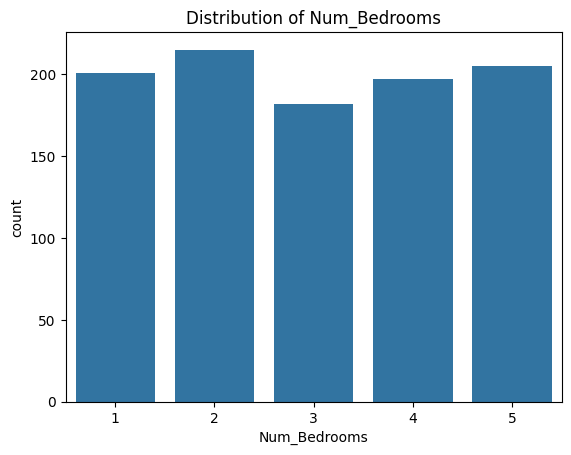

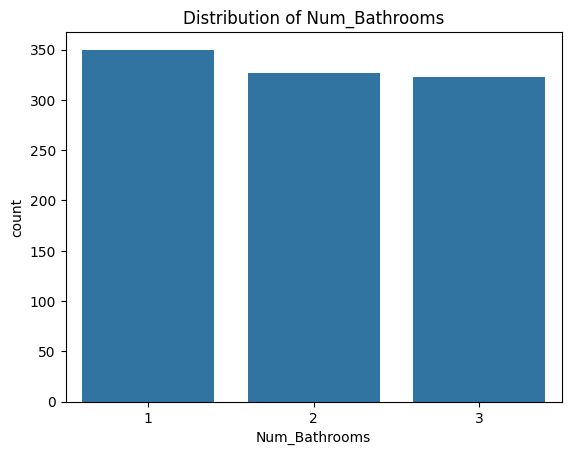

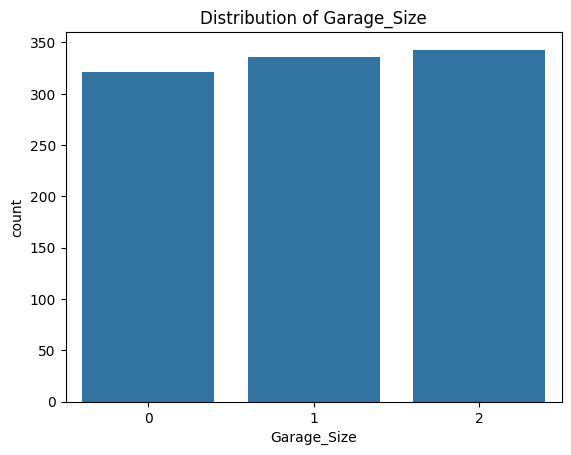

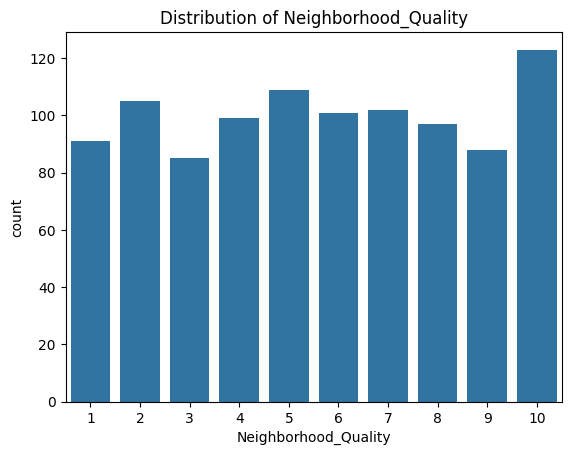

In [182]:
for col in ['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size',"Neighborhood_Quality"]:
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

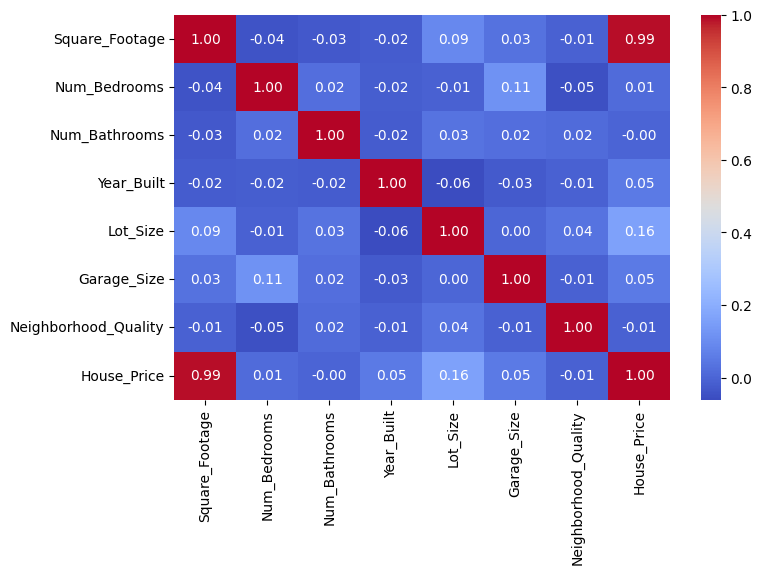

In [183]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

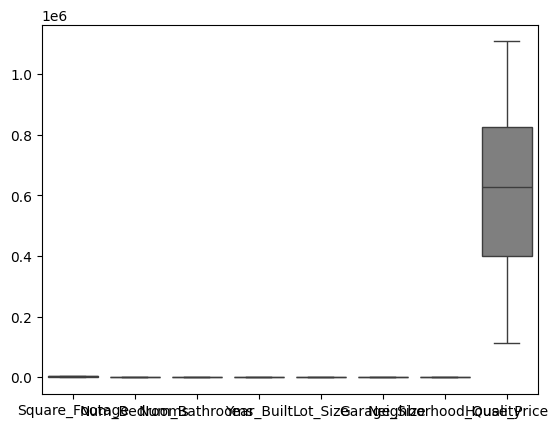

In [184]:
sns.boxplot(data=df)
plt.show()

In [185]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['House_Price'])  # Features
y = df['House_Price']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [186]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_s = mm.fit_transform(X_train)
X_test_s = mm.transform(X_test)

In [187]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

MAE: 8039.364515793608
RMSE: 101147579.14655785


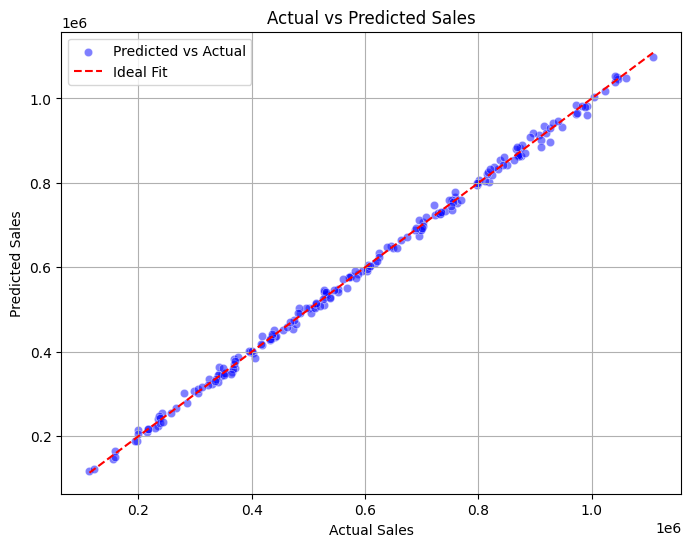

In [188]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label="Predicted vs Actual", color="blue")

# Plot y = x reference line (Perfect Predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label="Ideal Fit")

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [189]:
import joblib

# Save model
joblib.dump(model, "LinearRegression_model.joblib")

['LinearRegression_model.joblib']

In [190]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_s, y_train)

y_pred_rf = rf.predict(X_test_s)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf))

MAE: 16563.21474289186
RMSE: 404403003.05264586


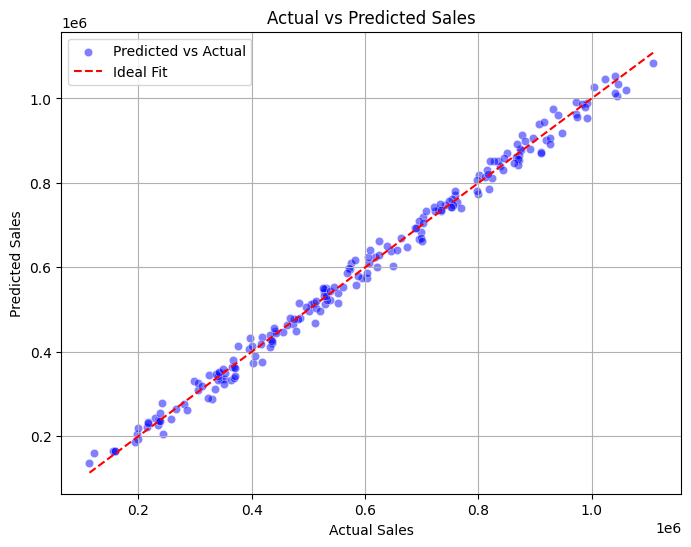

In [191]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, label="Predicted vs Actual", color="blue")

# Plot y = x reference line (Perfect Predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label="Ideal Fit")

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [192]:
import joblib

# Save model
joblib.dump(model, "RandomForestRegressor_model.joblib")

['RandomForestRegressor_model.joblib']

In [193]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_s, y_train)

y_pred_xgb = xgb.predict(X_test_s)

print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))

MAE: 13603.383739441117
RMSE: 302614334.98788863


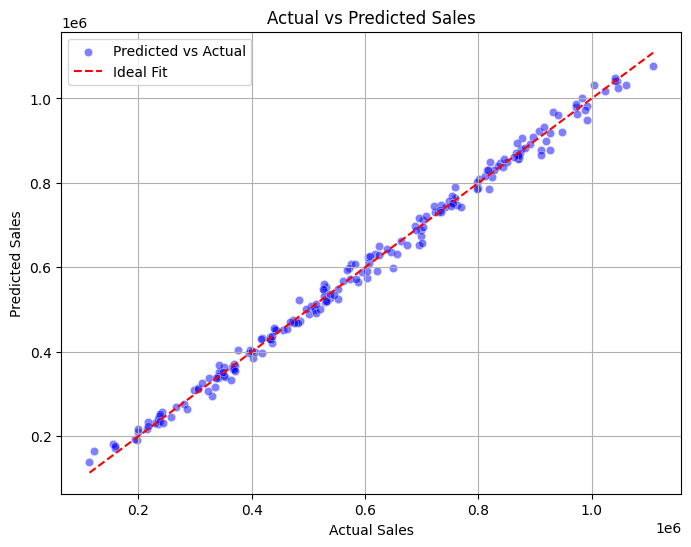

In [194]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, label="Predicted vs Actual", color="blue")

# Plot y = x reference line (Perfect Predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label="Ideal Fit")

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [195]:
import joblib

# Save model
joblib.dump(model, "XGBRegressor_model.joblib")

['XGBRegressor_model.joblib']

In [196]:
# loading linear regression model
model = joblib.load("LinearRegression_model.joblib")

In [202]:
# Define feature names
feature_names = [
    "Square_Footage", "Num_Bedrooms", "Num_Bathrooms",
    "Year_Built", "Lot_Size", "Garage_Size", "Neighborhood_Quality"
]

# Take user input
user_input = []
for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))  # Convert to float
    user_input.append(value)

# Convert to NumPy array and reshape
user_input_array = np.array(user_input).reshape(1, -1)

scaled_input = mm.transform(user_input_array)

predicted_price = model.predict(scaled_input)

print(f"🏠 Predicted House Price: ${predicted_price[0]:,.2f}")

Enter value for Square_Footage: 4798
Enter value for Num_Bedrooms: 5
Enter value for Num_Bathrooms: 1
Enter value for Year_Built: 1997
Enter value for Lot_Size: 3.345
Enter value for Garage_Size: 2
Enter value for Neighborhood_Quality: 1
🏠 Predicted House Price: $1,050,144.81
